Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [1]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:

#matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)
df_Aramco = pd.read_csv('Aramco.csv',parse_dates=True)
df_Bahri = pd.read_csv('Bahri.csv',parse_dates=True)
df_PetroRabigh = pd.read_csv('PetroRabigh.csv',parse_dates=True)
df_Sarco = pd.read_csv('Sarco.csv',parse_dates=True)

#stocks = ["2222.SR", "2380.SR", "2030.SR", "40.30.SR"]
#multpl_stocks = web.get_data_yahoo(stocks,start = "2020-11-08",end = "2021-11-07")
#df = pd.merge(df_Aramco, df_Bahri,df_PetroRabigh,df_Sarco,start = "2020-11-08",end = "2021-11-07")


no_of_portfolios = 2000

FileNotFoundError: [Errno 2] No such file or directory: 'Aramco.csv'

In [ ]:
#df_Aramco['return_A']=(df_Aramco['Adj Close']-df_Aramco['Adj Close'].shift(1))/(df_Aramco['Adj Close'].shift(1))
df_Aramco['return_A']=df_Aramco['Adj Close'].pct_change()
df_Bahri['return_B']=df_Bahri['Adj Close'].pct_change()
df_PetroRabigh['return_P']=df_PetroRabigh['Adj Close'].pct_change()
df_Sarco['return_S']=df_Sarco['Adj Close'].pct_change()

In [ ]:
df = pd.merge(df_Aramco, df_Bahri,on='Date',how='inner')
df=df[['Date','return_A','return_B']]
df = pd.merge(df, df_PetroRabigh,on='Date',how='inner')
df=df[['Date','return_A','return_B','return_P']]
df = pd.merge(df, df_Sarco,on='Date',how='inner')
df=df[['Date','return_A','return_B','return_P','return_S']]
df=df.dropna()
df.set_index('Date',inplace=True)
df

In [ ]:
matrix_of_return_values = df.to_numpy()
matrix_of_return_values = np.asmatrix(matrix_of_return_values)
matrix_of_return_values=matrix_of_return_values.T
#print(matrix_of_return_values)

In [3]:
#Objective 4.
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [4]:
#Objective 5.
no_of_asset_classes=4
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /=sum(random_asset_weights)
    random_asset_weights=np.asmatrix(random_asset_weights)
    return random_asset_weights 
#get_random_asset_weights(no_of_asset_classes)

In [5]:
#Objective 6.

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances =np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean =asset_weights*asset_means #t
    portfolio_mean=portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights*asset_covariances*asset_weights.T) #t
    portfolio_standard_deviation=portfolio_standard_deviation.item()
    portfolio_sharpe_ratio =portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
#get_portfolio_statistics(get_random_asset_weights(no_of_asset_classes),matrix_of_return_values)

In [6]:
#Objective 7.
no_of_portfolios=2000
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[0])
    portfolio_standard_deviations.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[2])

NameError: name 'matrix_of_return_values' is not defined

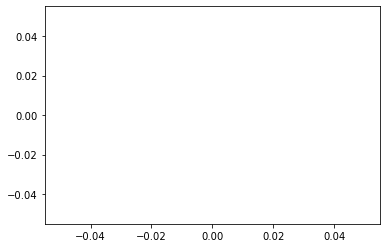

In [7]:
#Objective 8.
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [8]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

ValueError: max() arg is an empty sequence

In [ ]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

In [9]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

ValueError: max() arg is an empty sequence